In [1]:
import os
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from DLITE.SurfaceEvolver import SurfaceEvolver

In [2]:
os.chdir(r'../Notebooks/data/Synthetic_data/FOV_drift')
name_first = 'class_test_5_'
name_end = '.fe.txt'
number = 0.4

In [3]:
SurfaceEvolverInstance = SurfaceEvolver(name_first, name_end)

In [4]:
colonies = SurfaceEvolverInstance.FOV_Drift(number, solver = 'CellFIT')

Number of fit edges: 173
Number of cells 44 44
Solver is CellFIT
First colony {'0': <DLITE.cell_describe.colony object at 0x1177aff60>}
Next colony number 1
Next colony number 2


/Users/ritvikvasan/Documents/repos/DLITE/DLITE/cell_describe.py:908: LinAlgWarning: Ill-conditioned matrix (rcond=8.65324e-19): result may not be accurate.
  x = linalg.solve(r2, y)  # Solve Rx=y


Next colony number 3
Next colony number 4
Next colony number 5
Next colony number 6
Next colony number 7
Next colony number 8
Next colony number 9
Next colony number 10


In [5]:
colonies2 = SurfaceEvolverInstance.FOV_Drift(number, solver = 'DLITE')

Number of fit edges: 173
Number of cells 44 44
guess tension is [0.46, 0.71, 0.27, 0.38, 0.7, 0.18, 0.01, 0.78, 0.09, 0.53, 0.66, 0.61, 0.05, 0.66, 0.43, 0.32, 0.4, 0.68, 0.51, 0.95, 0.62, 0.12, 0.2, 0.3, 0.93, 0.91, 0.89, 0.72, 0.66, 0.54, 0.7, 0.28, 0.06, 0.13, 0.99, 0.17, 0.77, 0.85, 0.48, 0.38]
Function value 0.11366568139630127
Solution [0.32680295 0.35137942 0.34063896 0.36457032 0.31883179 0.3540695
 0.68892796 0.38141287 0.36061516 0.3810569  0.35432499 0.69011312
 0.68846325 0.68627473 0.68623485 0.6904037  0.68994146 0.69174467
 0.68580142 0.69220367 0.68608691 0.68491933 0.68382198 0.68847036
 0.68866244 0.69710675 0.6851544  0.68520094 0.68483366 0.68705352
 0.68432855 0.69296816 0.69466413 0.70109017 0.68265087 0.68835875
 0.68453651 0.67412357 0.67998109 0.6705643 ]


-----------------------------
guess pressure is [0.010551617376583078, 0.010551617376583078, 0.010551617376583078, 0.010551617376583078, 0.010551617376583078]
Function value 5.289514347658865e-07
Solution [0

guess tension is [0.3, 0.22, 0.32, 0.43, 0.32, 0.25, 0.87, 0.08, 0.74, 0.41, 0.77, 0.35, 0.28, 0.04, 0.93, 0.97, 0.04, 0.5, 0.39, 0.71, 0.62, 0.29, 0.27, 0.19, 0.94, 0.52, 0.9, 0.28, 0.31, 0.44, 0.06, 0.33, 0.33, 0.09, 0.39, 0.02, 0.77, 0.04, 0.37, 0.98, 0.41, 0.49, 0.09, 0.42, 0.74, 0.86, 0.31, 0.45, 0.26, 0.4, 0.43, 0.26, 0.13, 0.27, 0.68, 0.06, 0.46, 0.84, 0.05, 0.81, 0.22, 1.0, 0.84, 0.05, 0.5, 0.11, 0.6]
Function value 0.4040488996774274
Solution [0.65998101 0.65548599 0.66179777 0.67573932 0.33586009 0.65443585
 0.6533177  0.66063064 0.28487713 0.65986246 0.66057869 0.65835173
 0.65794526 0.26883728 0.66408062 0.2667439  0.6237979  0.29650119
 0.31879883 0.30904926 0.33894994 0.33077075 0.28921678 0.31367851
 0.62249084 0.32571665 0.34445503 0.60995088 0.62227825 0.27282028
 0.36029064 0.62059111 0.6212506  0.62167465 0.62136275 0.62062743
 0.62276488 0.61923186 0.61944345 0.62059421 0.6183593  0.61860156
 0.62340571 0.62503442 0.61930442 0.62577353 0.61853372 0.61882667
 0.61373

Function value 0.4578047357163824
Solution [0.76201848 0.76227026 0.75876047 0.76515429 0.76549096 0.7596315
 0.77214519 0.75317833 0.75133436 0.76389527 0.74627484 0.7534685
 0.79375397 0.43341558 0.75418553 0.75764358 0.7553577  0.74910927
 0.76497107 0.30278838 0.75206022 0.31414243 0.75442449 0.30910725
 0.76226466 0.75254053 0.7540867  0.76249961 0.32473054 0.76566561
 0.76255848 0.76252846 0.31158665 0.76957378 0.77847716 0.74853554
 0.40275992 0.40897042 0.32881539 0.43920203 0.74829125 0.38671408
 0.40852906 0.71963775 0.34816787 0.74161214 0.43398067 0.72227239
 0.42107713 0.72068822 0.72250908 0.39156277 0.38649697 0.37445528
 0.72500164 0.72760697 0.72363899 0.72228489 0.72480736 0.72039976
 0.72087773 0.7216779  0.72185096 0.72197661 0.72400912 0.72062316
 0.72605748 0.72336423 0.72369725 0.74943019 0.75136384 0.723177
 0.72189825 0.72311286 0.72062821 0.72371592 0.72267432 0.72181735
 0.72227291 0.72417447 0.7221971  0.72410648 0.72107951 0.72873443
 0.7243128  0.72491646]

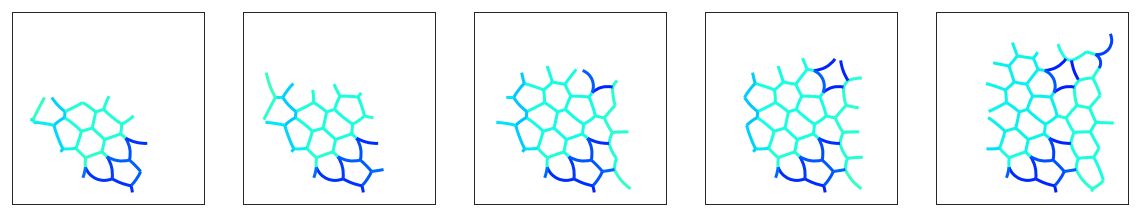

In [6]:
%matplotlib inline
sns.set(style="white")
sns.set_context("paper", font_scale = 2.5)

total = 5
fig, axn = plt.subplots(1, total, figsize = (20,20),sharey=True)
nums= [0,2, 4,6, 8]

for i, ax in enumerate(axn.flat):
    col = colonies2[str(nums[i])]
    tensions = [e.tension for e in col.tot_edges]
    mean_ten = np.mean(tensions)
    tensions = [e/mean_ten for e in tensions]

    col.plot_tensions(ax, fig, tensions, min_x=450, max_x=550, min_y=430, max_y=550, 
                      min_ten = 0, max_ten = 3, specify_color = 'jet',cbar = 'no', lw = 3)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set(xlim = [400,580], ylim = [400,580], aspect = 1)

In [7]:
from DLITE.PlottingFunctions import PlottingFunctions
PlottingFunctionsInstance = PlottingFunctions()

In [8]:
# We first find labels of edges that are present in all the colonies
common_edge_labels = PlottingFunctionsInstance.get_repeat_edge(colonies)
common_cell_labels = PlottingFunctionsInstance.get_repeat_cell(colonies)

common_edge_labels2 = PlottingFunctionsInstance.get_repeat_edge(colonies2)
common_cell_labels2 = PlottingFunctionsInstance.get_repeat_cell(colonies2)

In [9]:
# Make the dataframes
edges_dataframe, cells_dataframe = PlottingFunctionsInstance.seaborn_plot(None, colonies,
                                                                                  common_edge_labels,
                                                                                  common_cell_labels,
                                                                                  ground_truth = True)

# Make the dataframes
edges_dataframe2, cells_dataframe2 = PlottingFunctionsInstance.seaborn_plot(None, colonies2,
                                                                                  common_edge_labels2,
                                                                                  common_cell_labels2,
                                                                                  ground_truth = True)

/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1352: RuntimeWarning: invalid value encountered in true_divide
  cell_data['Pressures'].append([2*((c.pressure - min_pres) / float(max_pres - min_pres)) - 1 for c in v.cells if c.label == cell_lab][0])
/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1360: RuntimeWarning: invalid value encountered in true_divide
  - min_pres) / float(max_pres - min_pres))


In [10]:
tension_table = edges_dataframe.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')

ground_truth_tension_table = edges_dataframe.pivot_table(
        values='Ground_truth', 
        index=['Edge_Labels'], 
        columns='Time')

tension_table2 = edges_dataframe2.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')

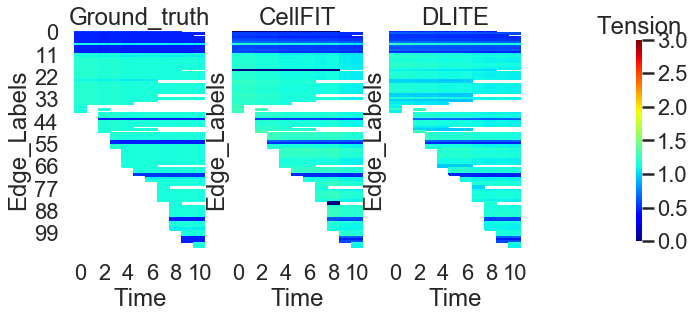

In [11]:
import seaborn as sns
import pylab
sns.set_context('poster')
fig, axn = plt.subplots(1, 3, figsize = (8,4),sharey=True)
cbar_ax = fig.add_axes([1.1, .15, .01, .7], title = 'Tension')

for i, ax in enumerate(axn.flat):
    if i == 0:
        df = ground_truth_tension_table
        title = 'Ground_truth'
    elif i == 1:
        df = tension_table
        title = 'CellFIT'
    elif i == 2:
        df = tension_table2
        title = 'DLITE'
    ax.set_title(title)
    sns.heatmap(df, ax=ax,
                cbar=i == 0, vmin=0, vmax=3, cmap = 'jet',
                cbar_ax=None if i else cbar_ax)


# pylab.savefig('heatmap.pdf')